In [2]:
import pandas as pd

df = pd.read_excel(r"C:\Users\disha\OneDrive\Desktop\Github projects\Bitcoin news.xlsx")

print(df.head())

                                                guid  \
0  CBMiXkFVX3lxTE5hbEpTdy1hTHZCdHRGcUhoaGpBRVNyTE...   
1  CBMivgFBVV95cUxQTGxsMHNHMlhXeGZzb05pZFFqVnhMOS...   
2  CBMiW0FVX3lxTE5lNW1ETi04cXhHUS1VWkJaWFFTMDJXb2...   
3  CBMiXkFVX3lxTE54MmJPNHpNekpLMExaM3FlODQySTE1bn...   
4  CBMigwFBVV95cUxOX2c2a2txd0dLQVZuZEJCVk5ZMkRqOT...   

                                               image  \
0  https://img.bgstatic.com/video/open_graph_new.png   
1  https://s.tradingview.com/static/images/illust...   
2  https://www.chaincatcher.com/upload/image/2025...   
3  https://img.bgstatic.com/video/open_graph_new.png   
4  https://blogger.googleusercontent.com/img/b/R2...   

                                                link  \
0  https://www.bitget.com/news/detail/12560604975544   
1  https://www.tradingview.com/news/zycrypto:0167...   
2    https://www.chaincatcher.com/en/article/2207160   
3  https://www.bitget.com/news/detail/12560604977768   
4  https://thehackernews.com/2025/09/20-popula

In [2]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\disha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# One-time setup: download NLTK data if you haven't already
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

# Assuming 'df' is your DataFrame that is already loaded.
# If not, uncomment the line below and replace with your file path
# df = pd.read_excel('your_file_name.xlsx')

# 1. Remove missing rows
df.dropna(subset=['title'], inplace=True)

# 3. Make every text in the title column lower case
df['lowercase_title'] = df['title'].astype(str).str.lower()

# 4. Remove special characters
df['no_special_chars'] = df['lowercase_title'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# 2. Tokenize it
df['tokenized_title'] = df['no_special_chars'].apply(word_tokenize)

# 5. Remove stopwords
stop_words = set(stopwords.words('english'))
df['title_no_stopwords'] = df['tokenized_title'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

print(df.head())

                                                guid  \
0  CBMiXkFVX3lxTE5hbEpTdy1hTHZCdHRGcUhoaGpBRVNyTE...   
1  CBMivgFBVV95cUxQTGxsMHNHMlhXeGZzb05pZFFqVnhMOS...   
2  CBMiW0FVX3lxTE5lNW1ETi04cXhHUS1VWkJaWFFTMDJXb2...   
3  CBMiXkFVX3lxTE54MmJPNHpNekpLMExaM3FlODQySTE1bn...   
4  CBMigwFBVV95cUxOX2c2a2txd0dLQVZuZEJCVk5ZMkRqOT...   

                                               image  \
0  https://img.bgstatic.com/video/open_graph_new.png   
1  https://s.tradingview.com/static/images/illust...   
2  https://www.chaincatcher.com/upload/image/2025...   
3  https://img.bgstatic.com/video/open_graph_new.png   
4  https://blogger.googleusercontent.com/img/b/R2...   

                                                link  \
0  https://www.bitget.com/news/detail/12560604975544   
1  https://www.tradingview.com/news/zycrypto:0167...   
2    https://www.chaincatcher.com/en/article/2207160   
3  https://www.bitget.com/news/detail/12560604977768   
4  https://thehackernews.com/2025/09/20-popula

In [4]:
df.to_excel('Bitcoin1.xlsx', index=False)

print("Successfully saved the updated DataFrame to 'updated_reviews.xlsx'")

Successfully saved the updated DataFrame to 'updated_reviews.xlsx'


In [8]:
import pandas as pd

# Step 1: Import TextBlob
try:
    from textblob import TextBlob
except ModuleNotFoundError:
    import sys
    !{sys.executable} -m pip install textblob
    from textblob import TextBlob

# Step 2: Load your Excel file (preprocessed or original)
df = pd.read_excel(r"C:\Users\disha\OneDrive\Desktop\Github projects\Bitcoin1 preprocessed file.xlsx")

# Step 3: Fill missing text with empty string (to avoid errors)
df['title'] = df['title'].fillna('')

# Step 4: Function to calculate sentiment polarity
def get_sentiment_score(text):
    return TextBlob(text).sentiment.polarity

# Step 5: Function to categorize sentiment
def get_sentiment_category(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Step 6: Apply sentiment analysis directly on 'text' column
df['sentiment_score'] = df['title_no_stopwords'].apply(get_sentiment_score)
df['sentiment_category'] = df['sentiment_score'].apply(get_sentiment_category)

# Step 7: Save to new Excel file
output_file = r'bitcoin2.xlsx'
df.to_excel(output_file, index=False)

print(f"✅ Successfully saved the DataFrame with sentiment analysis to:\n{output_file}")
print(df[['title_no_stopwords', 'sentiment_score', 'sentiment_category']].head())


✅ Successfully saved the DataFrame with sentiment analysis to:
bitcoin2.xlsx
                                  title_no_stopwords  sentiment_score  \
0       ['ethereum', 'bitcoin', 'go', 'rate', 'cut']             0.00   
1  ['top', 'analyst', 'sees', 'bitcoin', 'price',...             0.50   
2  ['hashwhale', 'crypto', 'weekly', 'report', 'i...             0.00   
3  ['golden', 'cross', 'signals', 'start', 'bitco...             0.15   
4  ['popular', 'npm', 'packages', 'billion', 'wee...             0.60   

  sentiment_category  
0            Neutral  
1           Positive  
2            Neutral  
3           Positive  
4           Positive  


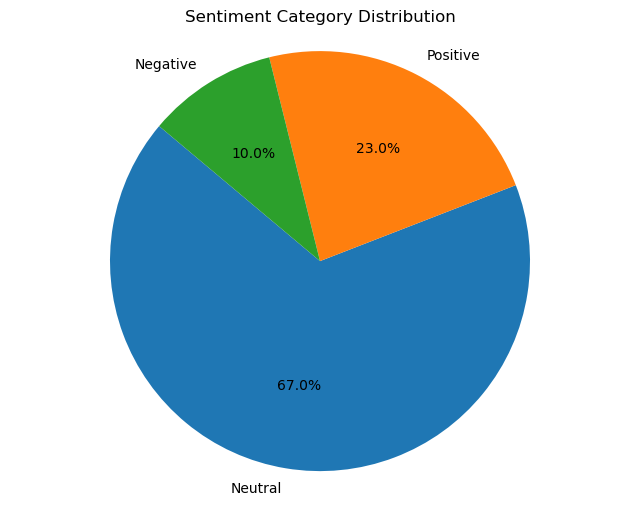

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the sentiment analysis results.
# If you are in a new session, load the data first:
# df = pd.read_excel('reviews_with_sentiment.xlsx')

# Count the occurrences of each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Category Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [14]:
# Ensure no NaNs and all are strings
df['processed_text_string'] = df['title_no_stopwords'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
df['processed_text_string'] = df['processed_text_string'].fillna('').astype(str)

# Drop empty rows
df = df[df['processed_text_string'].str.strip() != '']

# TF-IDF
vectorizer = TfidfVectorizer(max_df=0.95, min_df=1, stop_words='english')
tfidf = vectorizer.fit_transform(df['processed_text_string'])

# NMF
num_topics = 4
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(tfidf)

# Display topics
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        top_words = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
        print(" ".join(top_words))
        print("\n")

num_top_words = 5
feature_names = vectorizer.get_feature_names_out()
display_topics(nmf_model, feature_names, num_top_words)


Topic #1:
bitcoin ethereum kevin durant new


Topic #2:
price pi btc xrp eth


Topic #3:
trump statue holding appears dc


Topic #4:
crypto fraud wallets charges run




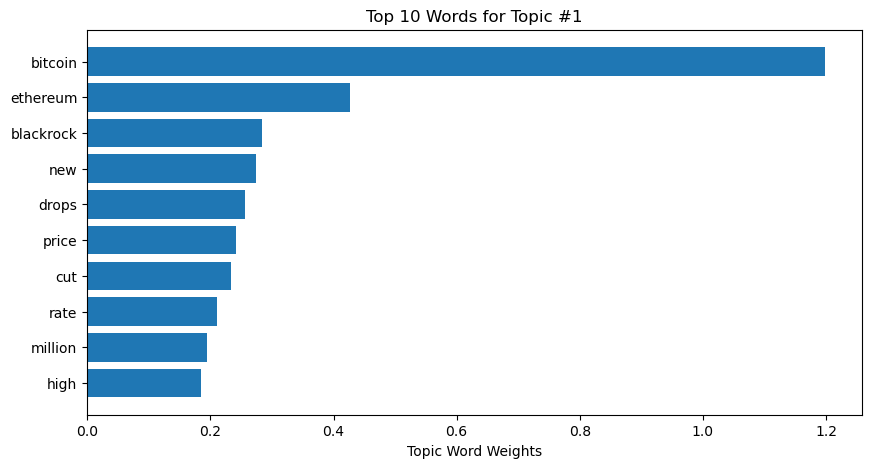

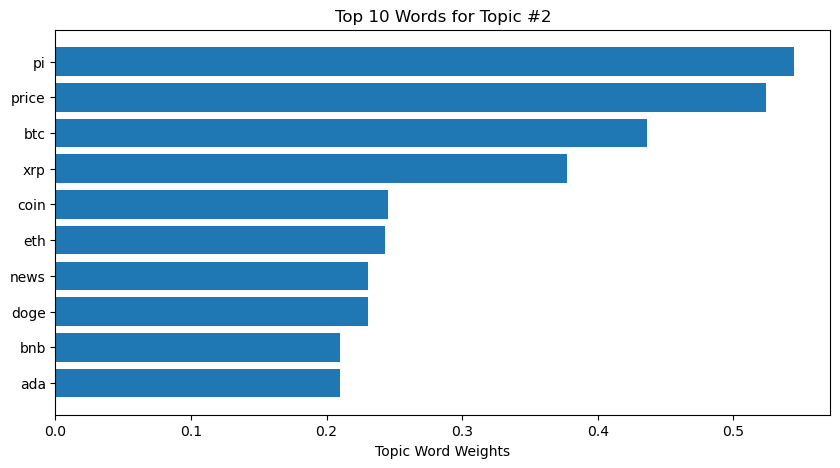

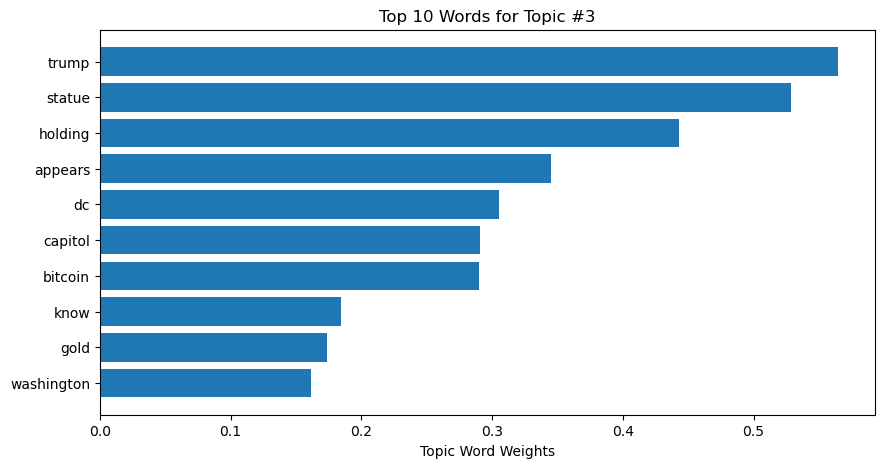

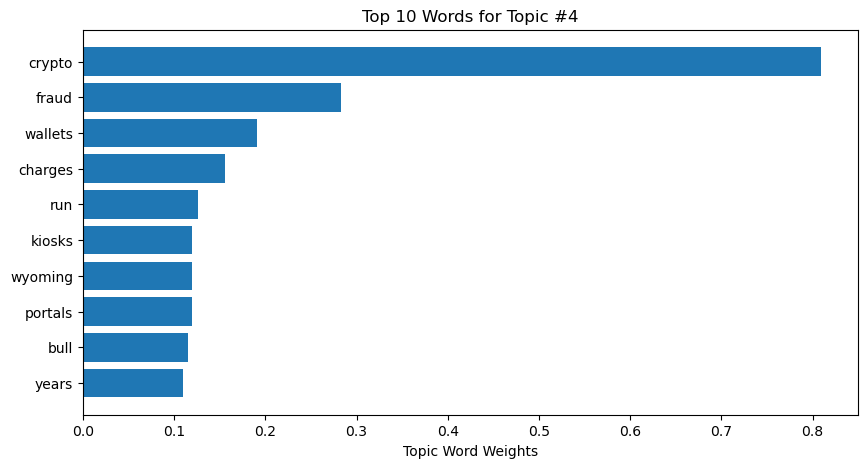

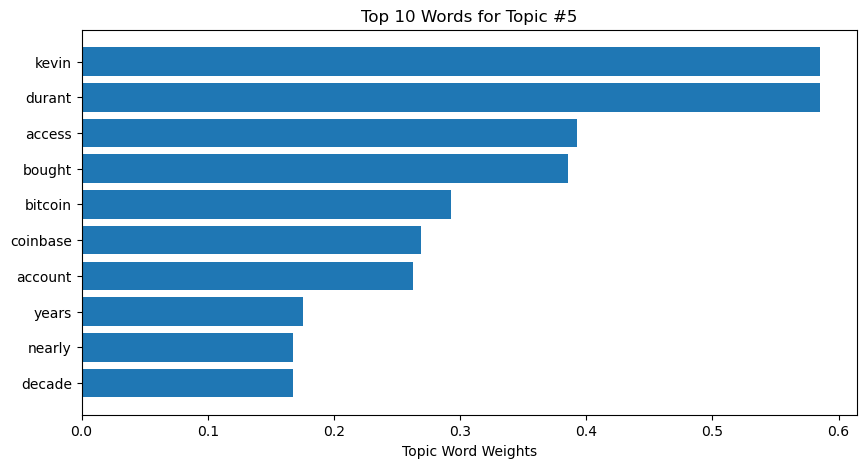

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'nmf_model' and 'vectorizer' are available from the previous step.

num_top_words = 10
feature_names = vectorizer.get_feature_names_out()

# Loop through each topic and create a bar chart
for topic_idx, topic in enumerate(nmf_model.components_):
    # Get the top words and their weights for the current topic
    top_word_indices = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_word_indices]
    top_weights = topic[top_word_indices]

    # Create the bar chart
    plt.figure(figsize=(10, 5))
    plt.barh(np.arange(num_top_words), top_weights, align='center')
    plt.yticks(np.arange(num_top_words), top_words)
    plt.gca().invert_yaxis()  # Invert y-axis to have the most important word on top
    plt.xlabel("Topic Word Weights")
    plt.title(f"Top {num_top_words} Words for Topic #{topic_idx + 1}")
    plt.show()

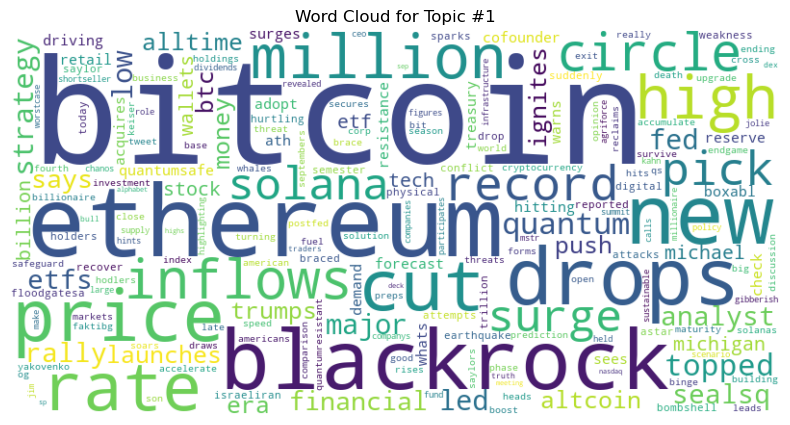

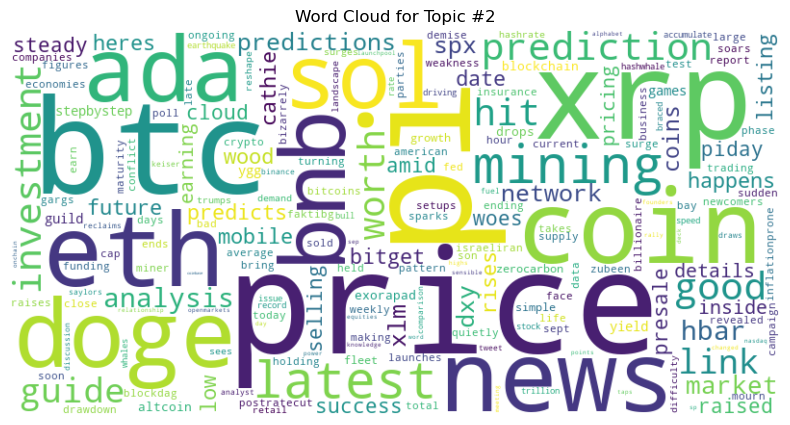

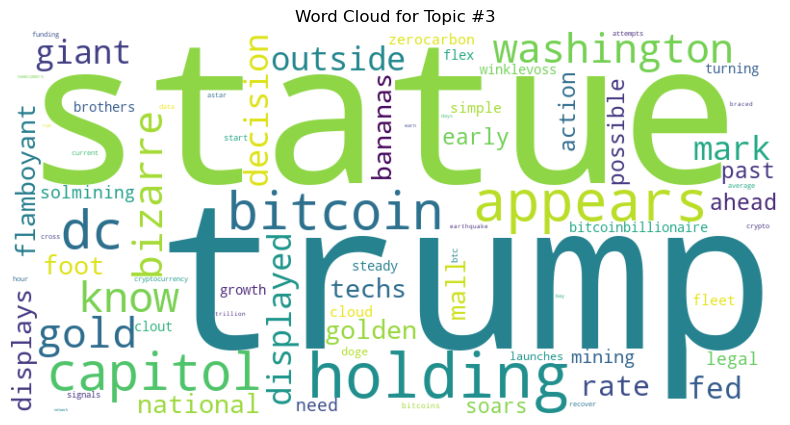

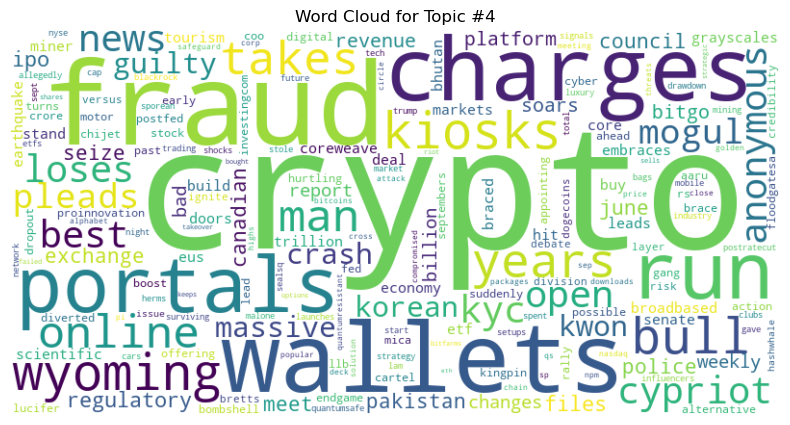

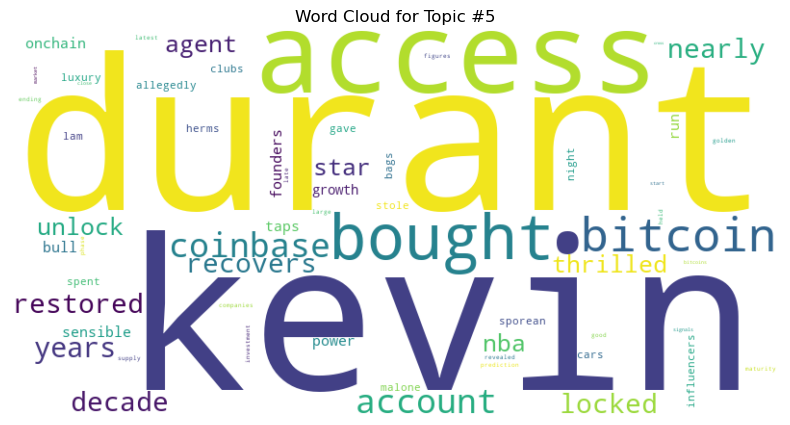

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming 'nmf_model' and 'vectorizer' are available from the previous step.
feature_names = vectorizer.get_feature_names_out()

# Loop through each topic to generate and display a word cloud
for topic_idx, topic in enumerate(nmf_model.components_):
    # Create a dictionary of words and their weights for the current topic
    topic_words = {feature_names[i]: topic[i] for i in topic.argsort()}

    # Create the WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)

    # Display the generated image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Topic #{topic_idx + 1}")
    plt.show()

In [16]:
from nltk.util import ngrams
from collections import Counter
import re

# 1. Load your data
df = pd.read_excel(r"C:\Users\disha\OneDrive\Desktop\bitcoin22.xlsx")

# 2. Prepare the text
# Ensure the column is string type and handle any potential empty cells
df['title_no_stopwords'].fillna('', inplace=True)

# Combine all text into one large list of words
# .split() will separate words based on spaces
all_words = [word for text in df['title_no_stopwords'] for word in text.split()]

# --- Bigram Analysis ---

# 3. Generate and count bigrams
bigrams = ngrams(all_words, 2)
bigram_counts = Counter(bigrams)

# 4. Format and display the most common bigrams
# We join the tuple of words back into a string for readability
most_common_bigrams = [(' '.join(gram), count) for gram, count in bigram_counts.most_common(20)]
bigram_df = pd.DataFrame(most_common_bigrams, columns=['Bigram', 'Frequency'])

print("--- Top 20 Most Common Bigrams ---")
print(bigram_df)
print("\n" + "="*40 + "\n")


# --- Trigram Analysis ---

# 5. Generate and count trigrams
trigrams = ngrams(all_words, 3)
trigram_counts = Counter(trigrams)

# 6. Format and display the most common trigrams
most_common_trigrams = [(' '.join(gram), count) for gram, count in trigram_counts.most_common(20)]
trigram_df = pd.DataFrame(most_common_trigrams, columns=['Trigram', 'Frequency'])

print("--- Top 20 Most Common Trigrams ---")
print(trigram_df)

--- Top 20 Most Common Bigrams ---
                     Bigram  Frequency
0     'holding', 'bitcoin',          4
1       ['kevin', 'durant',          3
2      ['bitcoin', 'price',          3
3       'bitcoin', 'price',          2
4             'btc', 'eth',          2
5             'eth', 'xrp',          2
6             'xrp', 'bnb',          2
7             'bnb', 'sol',          2
8    'emerging', 'fractal',          2
9            ['pi', 'coin',          2
10    ['michael', 'saylor',          2
11   'coinbase', 'bitcoin',          2
12    'bitcoin', 'account',          2
13     'statue', 'holding',          2
14     'crypto', 'wallets',          2
15           'fed', 'rate',          2
16      'trump', 'holding',          2
17   'price', 'prediction',          2
18    'good', 'investment']          2
19  ['ethereum', 'bitcoin',          1


--- Top 20 Most Common Trigrams ---
                              Trigram  Frequency
0                'btc', 'eth', 'xrp',          2
1         

C:\Users\disha\AppData\Local\Temp\ipykernel_11480\2637393417.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['title_no_stopwords'].fillna('', inplace=True)
